In [2]:
import numpy as np
import pandas as pd
import matplotlib
print matplotlib.__version__
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import ecc_calc as gwcalc
import unit_convert

%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1011/syr904/projects/SGRB'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1011/syr904/projects/SGRB/newruns'

1.5.1


In [18]:
##Read the data of the new models
data=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/table_allnums.txt')
Nini=data[:,1]; rvini=data[:,2]; zini=data[:,3]; rgini=data[:,4]
rc=data[:,5]; rhl=data[:,6]; mtot=data[:,7]; Nbh=data[:,8]; Nns=data[:,9]; Npsr=data[:,10]; Nmsp=data[:,11]
Ngwcap=data[:,12]; Nincluster=data[:,13]; Nesc=data[:,14]; Nescmerge=data[:,15]; DNS=data[:,16]; NSBH=data[:,17]

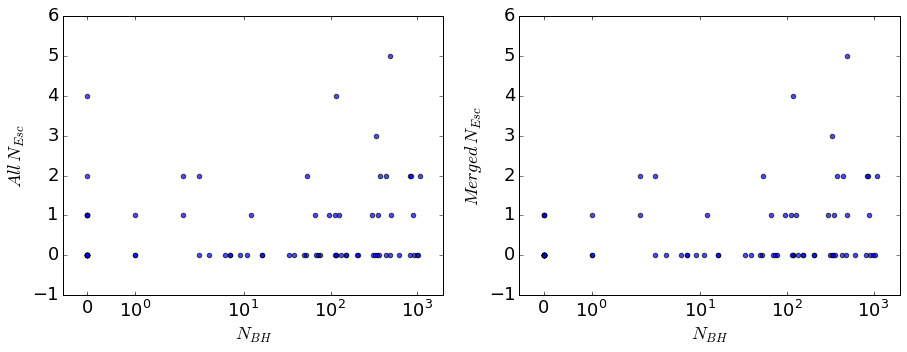

In [16]:
##Nbh vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(Nbh, Nesc, s=20, alpha=0.7)
ax1.set_xscale('symlog')
ax1.set_xlim(-0.5, 2000)
ax1.set_xlabel(r'$N_{BH}$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(Nbh, Nescmerge, s=20, alpha=0.7)
ax2.set_xscale('symlog')
ax2.set_xlim(-0.5, 2000)
ax2.set_xlabel(r'$N_{BH}$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

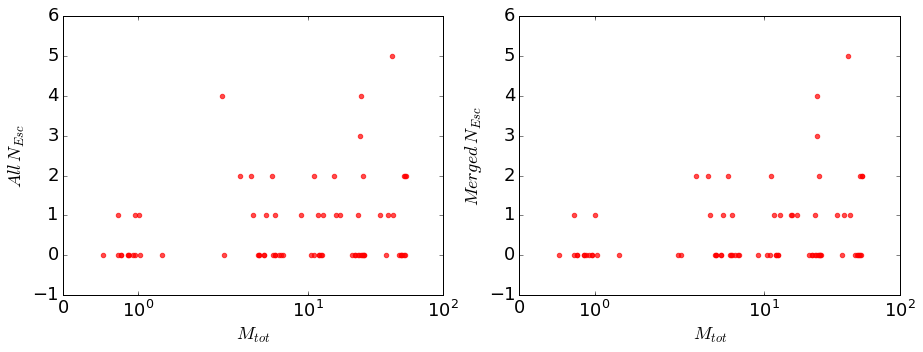

In [23]:
##Mtot vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(mtot, Nesc, s=20, alpha=0.7, color='r')
ax1.set_xscale('symlog')
ax1.set_xlim(0, 100)
ax1.set_xlabel(r'$M_{tot}$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(mtot, Nescmerge, s=20, alpha=0.7, color='r')
ax2.set_xscale('symlog')
ax2.set_xlim(0, 100)
ax2.set_xlabel(r'$M_{tot}$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

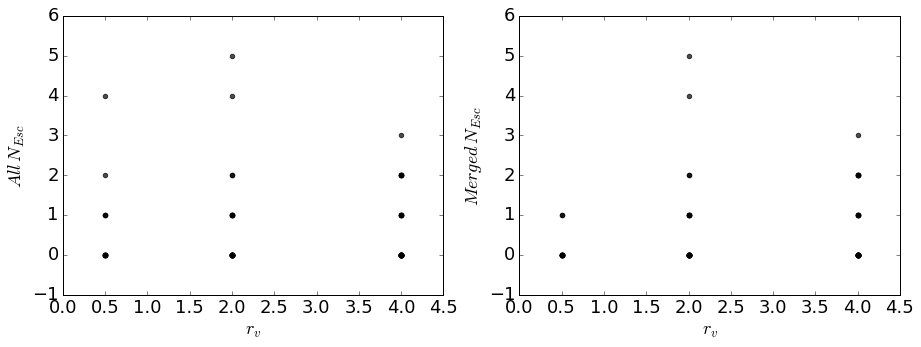

In [28]:
##rv vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(rvini, Nesc, s=20, alpha=0.7, color='k')
#ax1.set_xscale('symlog')
#ax1.set_xlim(0, 100)
ax1.set_xlabel(r'$r_v$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(rvini, Nescmerge, s=20, alpha=0.7, color='k')
#ax2.set_xscale('symlog')
#ax2.set_xlim(0, 100)
ax2.set_xlabel(r'$r_v$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

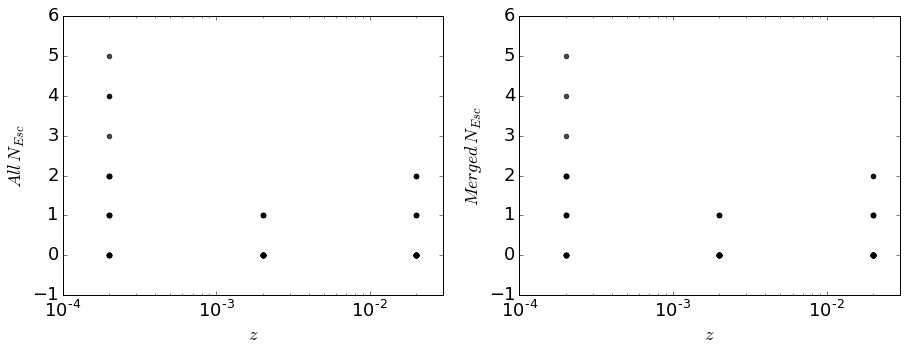

In [37]:
##Z vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(zini, Nesc, s=20, alpha=0.7, color='k')
ax1.set_xscale('log')
ax1.set_xlim(0.0001, 0.03)
ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(zini, Nescmerge, s=20, alpha=0.7, color='k')
ax2.set_xscale('log')
ax2.set_xlim(0.0001, 0.03)
ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

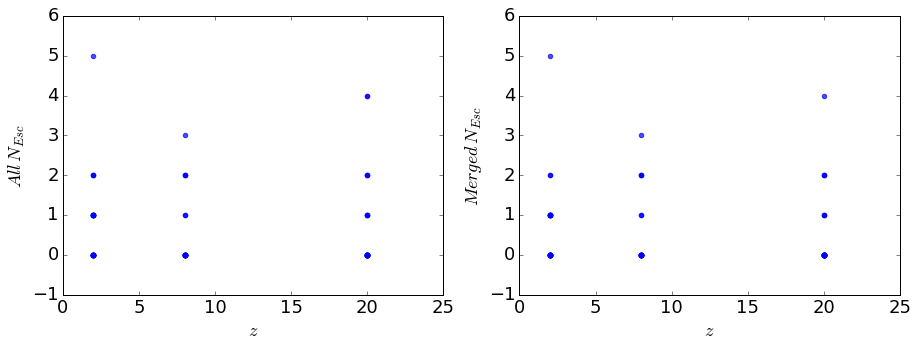

In [39]:
##rg vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(rgini, Nesc, s=20, alpha=0.7, color='b')
#ax1.set_xscale('log')
#ax1.set_xlim(0.0001, 0.03)
ax1.set_xlabel(r'$r_g$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(rgini, Nescmerge, s=20, alpha=0.7, color='b')
#ax2.set_xscale('log')
#ax2.set_xlim(0.0001, 0.03)
ax2.set_xlabel(r'$r_g$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

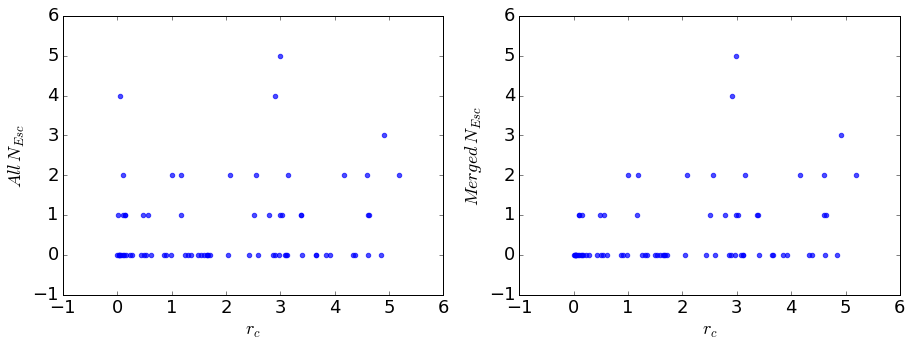

In [41]:
##rc vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(rc, Nesc, s=20, alpha=0.7, color='b')
#ax1.set_xscale('log')
#ax1.set_xlim(0.0001, 0.03)
ax1.set_xlabel(r'$r_c$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(rc, Nescmerge, s=20, alpha=0.7, color='b')
#ax2.set_xscale('log')
#ax2.set_xlim(0.0001, 0.03)
ax2.set_xlabel(r'$r_c$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')

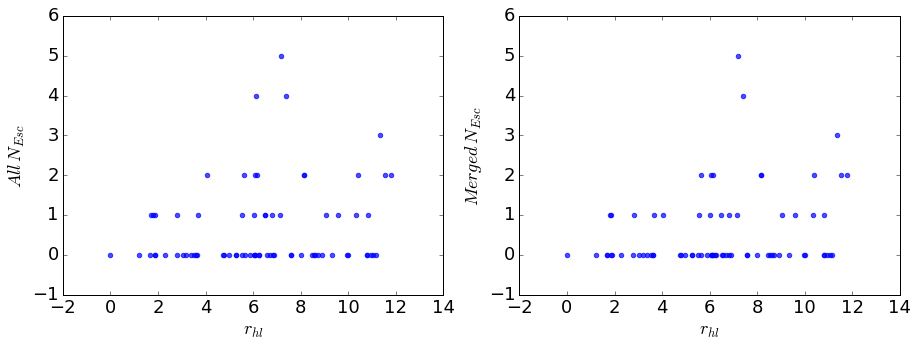

In [42]:
##rhl vs. Nesc_DNS
plt.rcParams['figure.figsize'] = [15, 5]
fig, (ax1, ax2)=plt.subplots(ncols=2)

ax1.scatter(rhl, Nesc, s=20, alpha=0.7, color='b')
#ax1.set_xscale('log')
#ax1.set_xlim(0.0001, 0.03)
ax1.set_xlabel(r'$r_{hl}$')
ax1.set_ylabel(r'$All\, N_{Esc}$')

ax2.scatter(rhl, Nescmerge, s=20, alpha=0.7, color='b')
#ax2.set_xscale('log')
#ax2.set_xlim(0.0001, 0.03)
ax2.set_xlabel(r'$r_{hl}$')
ax2.set_ylabel(r'$Merged\, N_{Esc}$')